<a href="https://colab.research.google.com/github/Ebratul/Python/blob/main/NLP/NLP1_Duplicate_Question_Pairs_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od

In [3]:
od.download("https://www.kaggle.com/datasets/quora/question-pairs-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: g65ashaharier21031
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/quora/question-pairs-dataset


100%|██████████| 20.8M/20.8M [00:00<00:00, 479MB/s]

In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv(r"/content/question-pairs-dataset/questions.csv")

In [6]:
df.head(5)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404351 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404351 non-null  int64 
 1   qid1          404351 non-null  int64 
 2   qid2          404351 non-null  int64 
 3   question1     404350 non-null  object
 4   question2     404349 non-null  object
 5   is_duplicate  404351 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [8]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
342526,342526,671355,671356,What does it take to create a social media and...,How do I create a social networking app?,1
133219,133219,263831,263832,How long does it take to renew an Indian passp...,How long does it take to renew an Indian passp...,0
213824,213824,421666,421667,Which is better company in mobile Samsung or M...,"At 29 yrs, is PhD good or psu job as career op...",0
14669,14669,29280,29281,"If you traveled back in time, where and when w...",Samsung Galaxy mega 6.3 could be updated to la...,0
147058,147058,290973,290974,"What are some dark, gory and violent animes wi...",What are the best romantic or non violent anim...,0
398856,398856,779287,779288,Do employees at United Community Banks have a ...,Do employees at Dime Community Bank have a goo...,0
363376,363376,711357,711358,What are some mind-blowing technologies things...,What are some mind-blowing Bike gadgets that e...,1
24125,24125,48130,48131,What is Contract Management Course and Trainin...,What is Contract Management Course?,1
175988,175988,347673,347674,What's the meaning of life?,What is the meaning of LIFE to you?,1
269813,269813,530697,342044,Why there are so few Quora users?,Why do there seem to be so few Quora users in ...,0


In [9]:
print(df.loc[238061, 'question1'])
#print(df['question1'].iloc[0])

How will banning Rs. 500 and Rs. 1000 notes help in overcoming corruption in India?


In [10]:
print(df.loc[238061, 'question2'])

How will replacing 1000 notes with 2000 notes going to stop corruption and black money?


In [11]:
df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,1
question2,2
is_duplicate,0


In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df['is_duplicate'].value_counts()

,count
is_duplicate,
0,255045
1,149306


In [14]:
df['is_duplicate'].count()

np.int64(404351)

<Axes: xlabel='is_duplicate'>

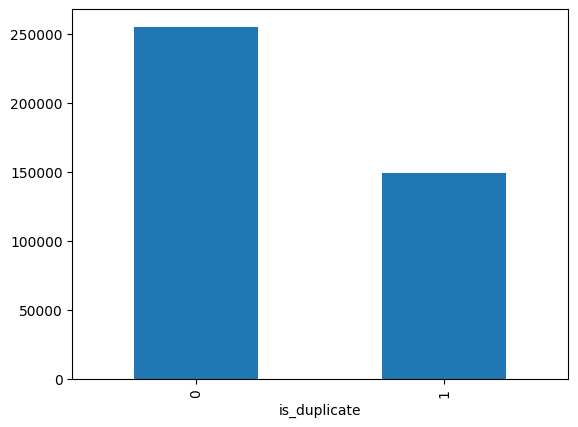

In [15]:
df['is_duplicate'].value_counts().plot(kind ='bar')
#plt.bar(x, y)

In [16]:
print("percentage(%)")
(df['is_duplicate'].value_counts() / df['is_duplicate'].count())*100

percentage(%)


,count
is_duplicate,
0,63.07515
1,36.92485


In [17]:
#unbalanced data

In [18]:
#repeated questions

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions ', np.unique(qid).shape[0])

Number of unique questions  789801


In [19]:
qid.value_counts().values

array([50, 47, 41, ...,  1,  1,  1])

In [20]:
x = qid.value_counts() > 1
print('number of question getting repeated', x[x].shape[0])

number of question getting repeated 13698


In [21]:
np.unique(qid).shape

(789801,)

In [22]:
x

,count
65333,True
7863,True
147324,True
2628,True
196396,True
...,...
530741,False
530743,False
530745,False
530747,False


In [23]:
x.value_counts()

,count
count,
False,776103
True,13698


<Axes: xlabel='count'>

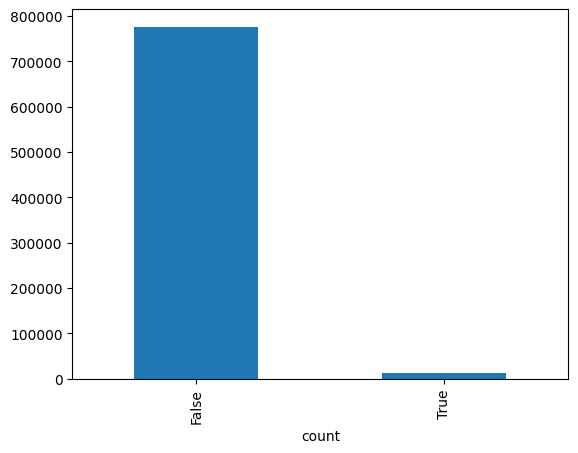

In [24]:
x.value_counts().plot(kind = 'bar')

In [25]:
x[x]

# x[x] মানে হলো:
# 👉 যে রো-গুলোতে x এর মান True, শুধু সেগুলোই রাখো।
# 👉 False থাকা রো গুলো বাদ দাও।

,count
65333,True
7863,True
147324,True
2628,True
196396,True
...,...
162499,True
109338,True
210212,True
113586,True


In [26]:
x[x].value_counts()

,count
count,
True,13698


In [27]:
x[~x]

,count
256089,False
265789,False
265822,False
255999,False
267907,False
...,...
530741,False
530743,False
530745,False
530747,False


In [28]:
import matplotlib.pyplot as plt

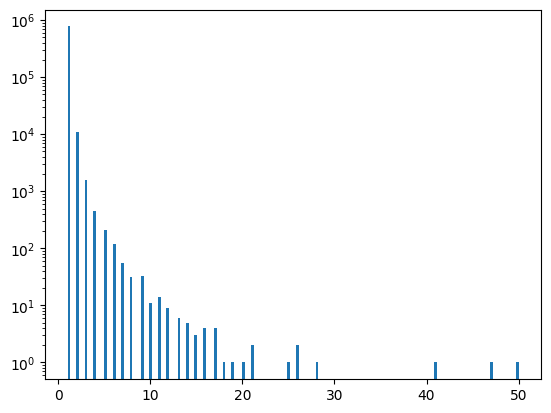

In [29]:
#repreated question histogram

plt.hist(qid.value_counts().values, bins =160)
plt.yscale('log')
plt.show()

In [30]:
qid.value_counts().max()

50

In [31]:
#incrimental learning => vacx, dask

In [32]:
df = df.sample(10000)

In [33]:
p_df = df

In [34]:
df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,0
question2,0
is_duplicate,0


In [35]:
df.duplicated().sum()

np.int64(0)

In [36]:
q_df = df[['question1','question2']]
q_df

,question1,question2
128374,What are some successful ways to quit smoking?,How can I stop smoking?
331799,What does CC or litre mean when describing the...,What is CC in engine specification? If a speci...
229804,Is Arnab Goswami biased?,Why is Arnab Goswami so biased towards BJP and...
318454,How difficult is it to become a Chartered Acco...,How long does it take to become a Chartered Ac...
392220,If the temperature of saturated water is incre...,An increasing temperature increases entropy. I...
...,...,...
383587,Are there any Ralph Lauren showrooms in India?,What locations are Ralph Lauren clothes made in?
380483,How does it feel having sex for the first time?,How did you feel when you had sex for the firs...
345596,What is the process in writing a novel?,What is the process of writing a novel like?
175826,What is the syllabus of amcat?,What is the syllabus of AMCAT for a CSE?


In [37]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

In [38]:
#marge text

question = list(q_df['question1']) +list(q_df['question2'])
# len(question)

In [39]:
cv = CountVectorizer(max_features=3000)

In [40]:
# val = cv.fit(question)
cv.fit_transform(question).toarray()
# np.vsplit(full_array, 2)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [41]:
q1_arr, q2_arr = np.vsplit(cv.fit_transform(question).toarray(), 2)

In [42]:
temp_df1 = pd.DataFrame(q1_arr, index = q_df.index)
temp_df2 = pd.DataFrame(q2_arr, index = q_df.index)
temp_df = pd.concat([temp_df1, temp_df1], axis=1)
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
128374,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
331799,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
229804,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
318454,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
392220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383587,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
380483,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
345596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
175826,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
temp_df1.shape

(10000, 3000)

In [44]:
temp_df.shape

(10000, 6000)

In [45]:
temp_df['is_duplicate'] = df['is_duplicate']
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
128374,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
331799,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
229804,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
318454,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
392220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383587,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
380483,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
345596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
175826,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
x = temp_df.iloc[:,0:-1]
y = temp_df.iloc[:,-1]
y

,is_duplicate
128374,1
331799,0
229804,1
318454,0
392220,0
...,...
383587,0
380483,1
345596,1
175826,0


In [47]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42)

In [48]:
# temp_df.iloc[:,0:-1].values

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# rf = RandomForestClassifier(n_estimators=500, criterion = 'entropy', max_depth =500)
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [50]:
y_pred = rf.predict(x_test)
accuracy_score(y_test, y_pred)

0.6872

In [51]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train.to_numpy(), y_train.to_numpy())

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [52]:
y_pred = xgb.predict(x_test.to_numpy())
accuracy_score(y_test.to_numpy(), y_pred)

0.6728

#Feature Engineering

In [53]:
df['q1_len'] = df['question1'].str.len()
df['q2_len'] = df['question2'].str.len()

In [54]:
df.head(5)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
128374,128374,254310,254311,What are some successful ways to quit smoking?,How can I stop smoking?,1,46,23
331799,331799,381945,650635,What does CC or litre mean when describing the...,What is CC in engine specification? If a speci...,0,66,152
229804,229804,452858,452859,Is Arnab Goswami biased?,Why is Arnab Goswami so biased towards BJP and...,1,24,52
318454,318454,624839,624840,How difficult is it to become a Chartered Acco...,How long does it take to become a Chartered Ac...,0,53,55
392220,392220,766592,766593,If the temperature of saturated water is incre...,An increasing temperature increases entropy. I...,0,130,65


In [55]:
#num of word
df['q1_num_word'] = df['question1'].apply(lambda x: len(x.split(" ")))
df['q2_num_word'] = df['question2'].apply(lambda x: len(x.split(" ")))

In [56]:
df.head(5)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word
128374,128374,254310,254311,What are some successful ways to quit smoking?,How can I stop smoking?,1,46,23,8,5
331799,331799,381945,650635,What does CC or litre mean when describing the...,What is CC in engine specification? If a speci...,0,66,152,13,29
229804,229804,452858,452859,Is Arnab Goswami biased?,Why is Arnab Goswami so biased towards BJP and...,1,24,52,4,10
318454,318454,624839,624840,How difficult is it to become a Chartered Acco...,How long does it take to become a Chartered Ac...,0,53,55,9,10
392220,392220,766592,766593,If the temperature of saturated water is incre...,An increasing temperature increases entropy. I...,0,130,65,20,9


In [57]:
[set(map(lambda x: x.lower().strip(), "What is is Elon Elon Musk's vision of Tesla Motors?".split(" ")))]

[{'elon', 'is', 'motors?', "musk's", 'of', 'tesla', 'vision', 'what'}]

In [58]:
"       What is is Elon Elon Musk's vision of Tesla Motors?          ".lower().strip()

"what is is elon elon musk's vision of tesla motors?"

In [59]:
#common word
def common_word(row):
  w1 = set(map(lambda x: x.lower().strip(), row['question1'].split(" ")))
  w2 = set(map(lambda x: x.lower().strip(), row['question2'].split(" ")))
  return len(w1 & w2)

In [60]:
df['word_common'] = df.apply(common_word, axis = 1)
df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,word_common
128374,128374,254310,254311,What are some successful ways to quit smoking?,How can I stop smoking?,1,46,23,8,5,1
331799,331799,381945,650635,What does CC or litre mean when describing the...,What is CC in engine specification? If a speci...,0,66,152,13,29,3
229804,229804,452858,452859,Is Arnab Goswami biased?,Why is Arnab Goswami so biased towards BJP and...,1,24,52,4,10,3
318454,318454,624839,624840,How difficult is it to become a Chartered Acco...,How long does it take to become a Chartered Ac...,0,53,55,9,10,7
392220,392220,766592,766593,If the temperature of saturated water is incre...,An increasing temperature increases entropy. I...,0,130,65,20,9,3
...,...,...,...,...,...,...,...,...,...,...,...
383587,383587,750091,750092,Are there any Ralph Lauren showrooms in India?,What locations are Ralph Lauren clothes made in?,0,46,48,8,8,3
380483,380483,744143,744144,How does it feel having sex for the first time?,How did you feel when you had sex for the firs...,1,47,53,10,12,7
345596,345596,677253,677254,What is the process in writing a novel?,What is the process of writing a novel like?,1,39,44,8,9,6
175826,175826,347354,347355,What is the syllabus of amcat?,What is the syllabus of AMCAT for a CSE?,0,30,40,6,9,5


In [61]:
#total word

def total_words(row):
  w1 = set(map(lambda x: x.lower().strip(), row['question1'].split(" ")))
  w2 = set(map(lambda x: x.lower().strip(), row['question2'].split(" ")))
  return (len(w1) + len(w2))

In [62]:
df['word_total'] = df.apply(total_words,  axis = 1)

In [63]:
df['word_share'] = round(df['word_common'] / df['word_total'], 2)

In [64]:
# analysis of feature
import seaborn as sb

minimum charactes 1
maximum charactes 316
avg n um of charactes 59.5128


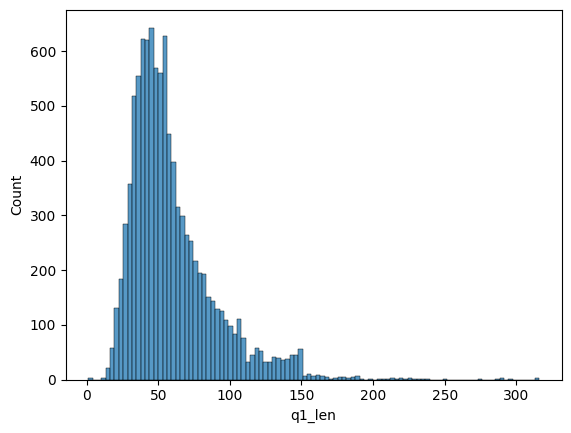

In [65]:
#EDA
sb.histplot(df['q1_len'])
print('minimum charactes', df['q1_len'].min())
print('maximum charactes', df['q1_len'].max())
print('avg n um of charactes', (df['q1_len'].mean()))

minimum charactes 11
maximum charactes 1151
avg n um of charactes 60.3781


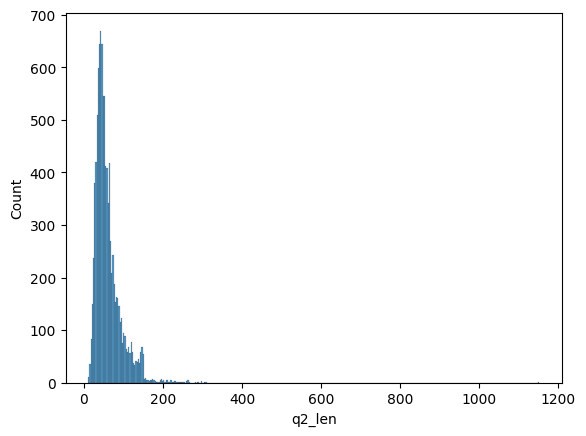

In [66]:
#EDA
sb.histplot(df['q2_len'])
print('minimum charactes', df['q2_len'].min())
print('maximum charactes', df['q2_len'].max())
print('avg n um of charactes', (df['q2_len'].mean()))

minimum charactes 1
maximum charactes 59
avg n um of charactes 10.9771


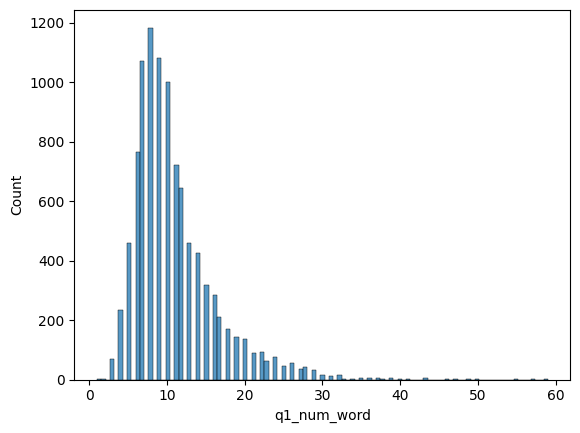

In [67]:
#EDA
sb.histplot(df['q1_num_word'])
print('minimum charactes', df['q1_num_word'].min())
print('maximum charactes', df['q1_num_word'].max())
print('avg n um of charactes', (df['q1_num_word'].mean()))

minimum charactes 2
maximum charactes 237
avg n um of charactes 11.2389


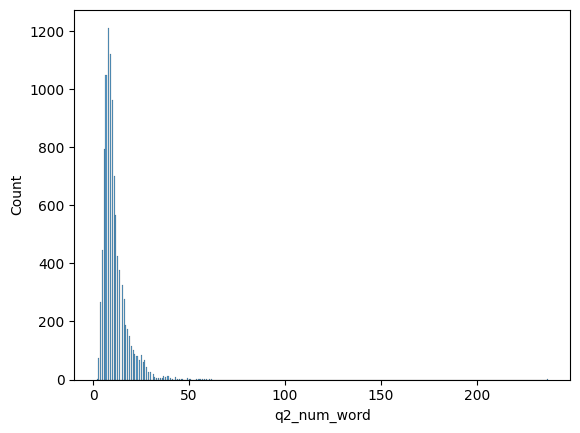

In [68]:
#EDA
sb.histplot(df['q2_num_word'])
print('minimum charactes', df['q2_num_word'].min())
print('maximum charactes', df['q2_num_word'].max())
print('avg n um of charactes', (df['q2_num_word'].mean()))

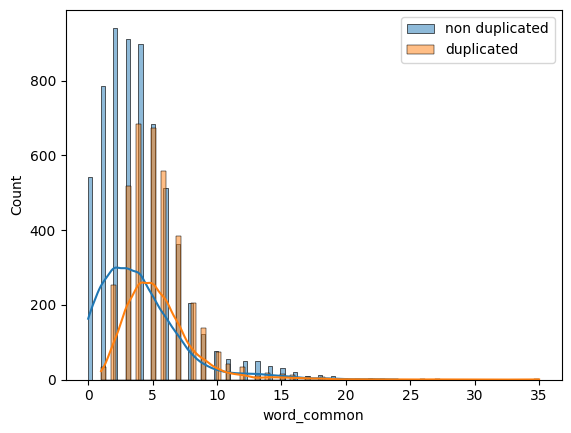

In [69]:
#common word
#EDA
sb.histplot(df[df['is_duplicate'] == 0]['word_common'], label = 'non duplicated',kde= True)
sb.histplot(df[df['is_duplicate'] == 1]['word_common'], label = 'duplicated', kde = True)
plt.legend()
plt.show()


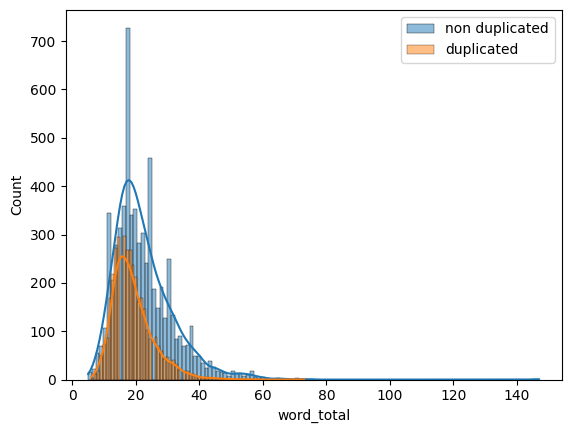

In [70]:
#total word
#EDA
sb.histplot(df[df['is_duplicate'] == 0]['word_total'], label = 'non duplicated',kde= True)
sb.histplot(df[df['is_duplicate'] == 1]['word_total'], label = 'duplicated', kde = True)
plt.legend()
plt.show()

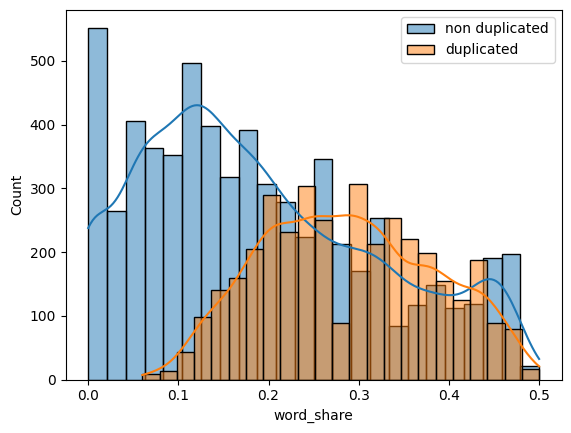

In [71]:
#total share
#EDA
sb.histplot(df[df['is_duplicate'] == 0]['word_share'], label = 'non duplicated',kde= True)
sb.histplot(df[df['is_duplicate'] == 1]['word_share'], label = 'duplicated', kde = True)
plt.legend()
plt.show()

In [72]:
qq_df = df[['question1', 'question2']]
qq_df

,question1,question2
128374,What are some successful ways to quit smoking?,How can I stop smoking?
331799,What does CC or litre mean when describing the...,What is CC in engine specification? If a speci...
229804,Is Arnab Goswami biased?,Why is Arnab Goswami so biased towards BJP and...
318454,How difficult is it to become a Chartered Acco...,How long does it take to become a Chartered Ac...
392220,If the temperature of saturated water is incre...,An increasing temperature increases entropy. I...
...,...,...
383587,Are there any Ralph Lauren showrooms in India?,What locations are Ralph Lauren clothes made in?
380483,How does it feel having sex for the first time?,How did you feel when you had sex for the firs...
345596,What is the process in writing a novel?,What is the process of writing a novel like?
175826,What is the syllabus of amcat?,What is the syllabus of AMCAT for a CSE?


In [73]:
f_df = df.drop(columns = ['id', 'qid1', 'qid2', 'question1', 'question2'])

In [74]:
f_df

,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,word_common,word_total,word_share
128374,1,46,23,8,5,1,13,0.08
331799,0,66,152,13,29,3,37,0.08
229804,1,24,52,4,10,3,14,0.21
318454,0,53,55,9,10,7,19,0.37
392220,0,130,65,20,9,3,27,0.11
...,...,...,...,...,...,...,...,...
383587,0,46,48,8,8,3,16,0.19
380483,1,47,53,10,12,7,21,0.33
345596,1,39,44,8,9,6,17,0.35
175826,0,30,40,6,9,5,15,0.33


In [75]:
from sklearn.feature_extraction.text import CountVectorizer

questions = list(df['question1']) + list(df['question2'])
cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(), 2)

In [76]:
cv.fit_transform(questions).toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [77]:
temp_df1 = pd.DataFrame(q1_arr, index = qq_df.index)
temp_df2 = pd.DataFrame(q2_arr, index = qq_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis = 1)
temp_df.shape

(10000, 6000)

In [78]:
d_df = pd.concat([f_df, temp_df], axis = 1)
d_df.shape

(10000, 6008)

In [79]:
d_df

,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
128374,1,46,23,8,5,1,13,0.08,0,0,...,0,0,0,0,0,0,0,0,0,0
331799,0,66,152,13,29,3,37,0.08,0,0,...,0,0,0,0,0,0,0,0,0,0
229804,1,24,52,4,10,3,14,0.21,0,0,...,0,0,0,0,0,0,0,0,0,0
318454,0,53,55,9,10,7,19,0.37,0,0,...,0,0,0,0,0,0,0,0,0,0
392220,0,130,65,20,9,3,27,0.11,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383587,0,46,48,8,8,3,16,0.19,0,0,...,0,0,0,0,0,0,0,0,0,0
380483,1,47,53,10,12,7,21,0.33,0,0,...,0,2,0,0,0,0,0,0,0,0
345596,1,39,44,8,9,6,17,0.35,0,0,...,0,0,0,0,0,0,0,0,0,0
175826,0,30,40,6,9,5,15,0.33,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
x = d_df.iloc[:,1::]
y = d_df.iloc[:,0]

In [81]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 42)

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(x_train.values, y_train.values)


RandomForestClassifier()

In [83]:
y_pred = rf.predict(x_test.values)
accuracy_score(y_test.values, y_pred)

0.7408

In [84]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train.values, y_train.values)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [85]:
y_pred = xgb.predict(x_test.values)
accuracy_score(y_test.values, y_pred)

0.7396

In [86]:
#Advanced Feature
# token feature
# length based feature
# fuzzy feature

In [87]:
replacements = {
        '%': ' percent ',
        '$': ' dollar ',
        '₹': ' rupee ',
        '€': ' euro ',
        '@': ' at ',
        '&': ' and ',
        '+': ' plus ',
    }
replacements.items()

dict_items([('%', ' percent '), ('$', ' dollar '), ('₹', ' rupee '), ('€', ' euro '), ('@', ' at '), ('&', ' and '), ('+', ' plus ')])

In [88]:
import string
from bs4 import BeautifulSoup
import re

In [89]:
import re
import string
from bs4 import BeautifulSoup

def preprocess(q):
    # convert into string, lowercase and trim
    q = str(q).lower().strip()

    # Replace some symbols with word equivalents
    replacements = {
        '%': ' percent ',
        '$': ' dollar ',
        '₹': ' rupee ',
        '€': ' euro ',
        '@': ' at ',
        '&': ' and ',
        '+': ' plus ',
    }
    for k, v in replacements.items():
        q = q.replace(k, v)

    # Remove special tag [math]
    q = q.replace('[math]', '')

    # Replace large numeric patterns
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)  # billion
    q = re.sub(r'([0-9]+)000000', r'\1m', q)      # million
    q = re.sub(r'([0-9]+)000', r'\1k', q)         # thousand

    # Expand common English contractions
    contractions = {
    # Common negative contractions
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "isn't": "is not",
    "mustn't": "must not",
    "mightn't": "might not",
    "might've": "might have",
    "must've": "must have",
    "needn't": "need not",
    "shan't": "shall not",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "wasn't": "was not",
    "weren't": "were not",
    "won't": "will not",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "ain't": "is not",

    # Pronoun contractions
    "i'm": "i am",
    "i'd": "i would",
    "i've": "i have",
    "i'll": "i will",
    "you're": "you are",
    "you'd": "you would",
    "you've": "you have",
    "you'll": "you will",
    "he's": "he is",
    "he'd": "he would",
    "he'll": "he will",
    "she's": "she is",
    "she'd": "she would",
    "she'll": "she will",
    "they're": "they are",
    "they'd": "they would",
    "they've": "they have",
    "they'll": "they will",
    "we're": "we are",
    "we'd": "we would",
    "we've": "we have",
    "we'll": "we will",

    # Verb + not with short forms
    "daren't": "dare not",
    "needn't": "need not",
    "oughtn't": "ought not",

    # Modal/Helping verb contractions
    "let's": "let us",
    "here's": "here is",
    "there's": "there is",
    "that's": "that is",
    "what's": "what is",
    "who's": "who is",
    "where's": "where is",
    "when's": "when is",
    "why's": "why is",
    "how's": "how is",

    # Informal / slang contractions
    "y'all": "you all",
    "innit": "is it not",
    "gonna": "going to",
    "wanna": "want to",
    "gotta": "got to",
    "kinda": "kind of",
    "sorta": "sort of",
    "lemme": "let me",
    "gimme": "give me",
    "ain't": "is not"
}

    for c, v in contractions.items():
        q = q.replace(c, v)

    # Expanding remaining "'t", "'ve", "'re", "'ll"
    q = q.replace("n't", " not")
    q = q.replace("'ve", " have")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")

    # Removing HTML
    q = BeautifulSoup(q, "html.parser").get_text()

    # Remove punctuation
    q = q.translate(str.maketrans('', '', string.punctuation))

    # Remove extra whitespace
    q = re.sub(r'\s+', ' ', q).strip()

    return q


In [90]:
test = "Hello!!! <b>I'm</b> 1000000% sure &amp; I can't do this!"
print(preprocess(test))

hello i am 1m percent sure and amp i cannot do this


In [91]:
BeautifulSoup("<b>I'm</b>", "html.parser").get_text()

"I'm"

In [92]:
p_df['question1'] = p_df['question1'].apply(preprocess)
p_df['question2'] = p_df['question2'].apply(preprocess)

In [93]:
p_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,word_common,word_total,word_share
128374,128374,254310,254311,what are some successful ways to quit smoking,how can i stop smoking,1,46,23,8,5,1,13,0.08
331799,331799,381945,650635,what does cc or litre mean when describing the...,what is cc in engine specification if a specif...,0,66,152,13,29,3,37,0.08
229804,229804,452858,452859,is arnab goswami biased,why is arnab goswami so biased towards bjp and...,1,24,52,4,10,3,14,0.21
318454,318454,624839,624840,how difficult is it to become a chartered acco...,how long does it take to become a chartered ac...,0,53,55,9,10,7,19,0.37
392220,392220,766592,766593,if the temperature of saturated water is incre...,an increasing temperature increases entropy is...,0,130,65,20,9,3,27,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383587,383587,750091,750092,are there any ralph lauren showrooms in india,what locations are ralph lauren clothes made in,0,46,48,8,8,3,16,0.19
380483,380483,744143,744144,how does it feel having sex for the first time,how did you feel when you had sex for the firs...,1,47,53,10,12,7,21,0.33
345596,345596,677253,677254,what is the process in writing a novel,what is the process of writing a novel like,1,39,44,8,9,6,17,0.35
175826,175826,347354,347355,what is the syllabus of amcat,what is the syllabus of amcat for a cse,0,30,40,6,9,5,15,0.33


In [94]:
p_df['q1_len'] = p_df['question1'].str.len()
p_df['q2_len'] = p_df['question2'].str.len()

In [95]:
p_df['q1_num_words'] = p_df['question1'].apply(lambda x: len(x.split(" ")))
p_df['q2_num_words'] = p_df['question2'].apply(lambda x: len(x.split(" ")))

In [96]:
def common_words(df):
  w1 = set(map(lambda word: word.lower().strip(), df['question1'].split(" ")))
  w2 = set(map(lambda word: word.lower().strip(), df['question2'].split(" ")))
  return len(w1 & w2)

In [97]:
p_df['word_common'] = p_df.apply(common_words, axis=1)

In [98]:
def total_word(df):
  w1 = set(map(lambda word: word.lower().strip(), df['question1'].split(" ")))
  w2 = set(map(lambda word: word.lower().strip(), df['question2'].split(" ")))
  return len(w1) + len(w2)

In [99]:
p_df['word_total'] = p_df.apply(total_word, axis=1)

In [100]:
p_df['word_share'] = round(p_df['word_common'] / p_df['word_total'] , 2)
p_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,word_common,word_total,word_share,q1_num_words,q2_num_words
128374,128374,254310,254311,what are some successful ways to quit smoking,how can i stop smoking,1,45,22,8,5,1,13,0.08,8,5
331799,331799,381945,650635,what does cc or litre mean when describing the...,what is cc in engine specification if a specif...,0,65,144,13,29,4,36,0.11,13,29
229804,229804,452858,452859,is arnab goswami biased,why is arnab goswami so biased towards bjp and...,1,23,51,4,10,4,14,0.29,4,10
318454,318454,624839,624840,how difficult is it to become a chartered acco...,how long does it take to become a chartered ac...,0,52,54,9,10,7,19,0.37,9,10
392220,392220,766592,766593,if the temperature of saturated water is incre...,an increasing temperature increases entropy is...,0,128,63,20,9,4,26,0.15,20,9


In [101]:
# Advanced Feature

from nltk.corpus import stopwords

In [102]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

def fetch_tokens_features(row):
    q1 = row['question1']
    q2 = row['question2']

    SAFE_DIV = 0.0001
    stop_words = stopwords.words('english')
    token_feature = [0.0] * 8

    # Convert sentences into tokens
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_feature

    # Non-stopwords
    q1_word  = set([word for word in q1_tokens if word not in stop_words])
    q2_word  = set([word for word in q2_tokens if word not in stop_words])

    # Stopwords
    q1_stop = set([word for word in q1_tokens if word in stop_words])
    q2_stop = set([word for word in q2_tokens if word in stop_words])

    # Common counts
    common_word_count = len(q1_word.intersection(q2_word))
    common_stop_count = len(q1_stop.intersection(q2_stop))
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))

    # Features
    token_feature[0] = common_word_count / (min(len(q1_word), len(q2_word)) + SAFE_DIV)
    token_feature[1] = common_word_count / (max(len(q1_word), len(q2_word)) + SAFE_DIV)
    token_feature[2] = common_stop_count / (min(len(q1_stop), len(q2_stop)) + SAFE_DIV)
    token_feature[3] = common_stop_count / (max(len(q1_stop), len(q2_stop)) + SAFE_DIV)
    token_feature[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_feature[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

    # First and last word match
    token_feature[6] = int(q1_tokens[-1] == q2_tokens[-1])
    token_feature[7] = int(q1_tokens[0] == q2_tokens[0])

    return token_feature


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [103]:
token_feature = p_df.apply(fetch_tokens_features, axis = 1)


p_df['cwc_min'] = list(map(lambda x:x[0], token_feature))
p_df['cwc_max'] = list(map(lambda x:x[1], token_feature))
p_df['csc_min'] = list(map(lambda x:x[2], token_feature))
p_df['csc_max'] = list(map(lambda x:x[3], token_feature))
p_df['ctc_min'] = list(map(lambda x:x[4], token_feature))
p_df['ctc_max'] = list(map(lambda x:x[5], token_feature))
p_df['last_word_eq'] = list(map(lambda x:x[6], token_feature))
p_df['first_word_eq'] = list(map(lambda x:x[7], token_feature))


In [104]:
p_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,...,q1_num_words,q2_num_words,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
128374,128374,254310,254311,what are some successful ways to quit smoking,how can i stop smoking,1,45,22,8,5,...,8,5,0.499975,0.249994,0.000000,0.000000,0.199996,0.124998,1.0,0.0
331799,331799,381945,650635,what does cc or litre mean when describing the...,what is cc in engine specification if a specif...,0,65,144,13,29,...,13,29,0.333328,0.142856,0.285710,0.222220,0.307690,0.137931,0.0,1.0
229804,229804,452858,452859,is arnab goswami biased,why is arnab goswami so biased towards bjp and...,1,23,51,4,10,...,4,10,0.999967,0.499992,0.999900,0.249994,0.999975,0.399996,0.0,0.0
318454,318454,624839,624840,how difficult is it to become a chartered acco...,how long does it take to become a chartered ac...,0,52,54,9,10,...,9,10,0.749981,0.599988,0.799984,0.799984,0.777769,0.699993,1.0,1.0
392220,392220,766592,766593,if the temperature of saturated water is incre...,an increasing temperature increases entropy is...,0,128,63,20,9,...,20,9,0.333328,0.222220,0.666644,0.249997,0.444440,0.199999,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383587,383587,750091,750092,are there any ralph lauren showrooms in india,what locations are ralph lauren clothes made in,0,45,47,8,8,...,8,8,0.499988,0.399992,0.666644,0.499988,0.499994,0.499994,0.0,0.0
380483,380483,744143,744144,how does it feel having sex for the first time,how did you feel when you had sex for the firs...,1,46,52,10,12,...,10,12,0.999975,0.999975,0.499992,0.428565,0.699993,0.583328,1.0,1.0
345596,345596,677253,677254,what is the process in writing a novel,what is the process of writing a novel like,1,38,43,8,9,...,8,9,0.999967,0.749981,0.799984,0.799984,0.874989,0.777769,0.0,1.0
175826,175826,347354,347355,what is the syllabus of amcat,what is the syllabus of amcat for a cse,0,29,39,6,9,...,6,9,0.999950,0.666644,0.999975,0.666656,0.999983,0.666659,0.0,1.0


#Length Based feature

In [105]:
from nltk.metrics import distance

In [106]:
def longest_common_substring(s1, s2):
    max_len = 0
    for i in range(len(s1)):
        for j in range(len(s2)):
            length = 0
            while i + length < len(s1) and j + length < len(s2) and s1[i + length] == s2[j + length]:
                length += 1
            max_len = max(max_len, length)
    return max_len


In [107]:
def fetch_length_features(row):
    q1 = str(row['question1'])
    q2 = str(row['question2'])

    length_features = [0.0]*3

    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

    # Absolute length difference
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))

    # Average token length
    length_features[1] = (len(q1_tokens) + len(q2_tokens)) / 2

    # Longest common substring ratio
    lcs_len = longest_common_substring(q1, q2)
    length_features[2] = lcs_len / (min(len(q1), len(q2)) + 1)

    return length_features


In [108]:
length_feature = p_df.apply(fetch_length_features, axis = 1)

In [109]:
length_feature

,0
128374,"[3, 6.5, 0.34782608695652173]"
331799,"[16, 21.0, 0.12121212121212122]"
229804,"[6, 7.0, 0.7083333333333334]"
318454,"[1, 9.5, 0.6226415094339622]"
392220,"[11, 14.5, 0.203125]"
...,...
383587,"[0, 8.0, 0.30434782608695654]"
380483,"[2, 11.0, 0.48936170212765956]"
345596,"[1, 8.5, 0.5128205128205128]"
175826,"[3, 7.5, 0.9666666666666667]"


In [110]:
p_df['abs_len_diff'] = list(map(lambda x:x[0], length_feature))
p_df['mean_len'] = list(map(lambda x:x[1], length_feature))
p_df['longest_substr_ratio'] = list(map(lambda x:x[2], length_feature))

In [111]:
p_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
128374,128374,254310,254311,what are some successful ways to quit smoking,how can i stop smoking,1,45,22,8,5,...,0.249994,0.000000,0.000000,0.199996,0.124998,1.0,0.0,3.0,6.5,0.347826
331799,331799,381945,650635,what does cc or litre mean when describing the...,what is cc in engine specification if a specif...,0,65,144,13,29,...,0.142856,0.285710,0.222220,0.307690,0.137931,0.0,1.0,16.0,21.0,0.121212
229804,229804,452858,452859,is arnab goswami biased,why is arnab goswami so biased towards bjp and...,1,23,51,4,10,...,0.499992,0.999900,0.249994,0.999975,0.399996,0.0,0.0,6.0,7.0,0.708333
318454,318454,624839,624840,how difficult is it to become a chartered acco...,how long does it take to become a chartered ac...,0,52,54,9,10,...,0.599988,0.799984,0.799984,0.777769,0.699993,1.0,1.0,1.0,9.5,0.622642
392220,392220,766592,766593,if the temperature of saturated water is incre...,an increasing temperature increases entropy is...,0,128,63,20,9,...,0.222220,0.666644,0.249997,0.444440,0.199999,0.0,0.0,11.0,14.5,0.203125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383587,383587,750091,750092,are there any ralph lauren showrooms in india,what locations are ralph lauren clothes made in,0,45,47,8,8,...,0.399992,0.666644,0.499988,0.499994,0.499994,0.0,0.0,0.0,8.0,0.304348
380483,380483,744143,744144,how does it feel having sex for the first time,how did you feel when you had sex for the firs...,1,46,52,10,12,...,0.999975,0.499992,0.428565,0.699993,0.583328,1.0,1.0,2.0,11.0,0.489362
345596,345596,677253,677254,what is the process in writing a novel,what is the process of writing a novel like,1,38,43,8,9,...,0.749981,0.799984,0.799984,0.874989,0.777769,0.0,1.0,1.0,8.5,0.512821
175826,175826,347354,347355,what is the syllabus of amcat,what is the syllabus of amcat for a cse,0,29,39,6,9,...,0.666644,0.999975,0.666656,0.999983,0.666659,0.0,1.0,3.0,7.5,0.966667


In [112]:
!pip install fuzzywuzzy

In [113]:
from fuzzywuzzy import fuzz

/usr/local/lib/python3.12/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [114]:
def fetch_fuzzy_feature(row):
    q1 = row['question1']
    q2 = row['question2']

    fuzzy_feature = [0.0]*4

    # fuzz_ratio
    fuzzy_feature[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_feature[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_feature[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_feature[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_feature



In [115]:
# Apply function to DataFrame
fuzzy_feature = p_df.apply(fetch_fuzzy_feature, axis=1)

In [116]:
p_df['fuzz_ratio'] = list(map(lambda x:x[0], fuzzy_feature))
p_df['fuzz_partial_ratio'] = list(map(lambda x:x[1], fuzzy_feature))
p_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_feature))
p_df['token_set_ratio'] = list(map(lambda x:x[3], fuzzy_feature))

In [117]:
p_df.shape

(10000, 30)

In [118]:
p_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
128374,128374,254310,254311,what are some successful ways to quit smoking,how can i stop smoking,1,45,22,8,5,...,0.124998,1.0,0.0,3.0,6.5,0.347826,45,55,45,48
331799,331799,381945,650635,what does cc or litre mean when describing the...,what is cc in engine specification if a specif...,0,65,144,13,29,...,0.137931,0.0,1.0,16.0,21.0,0.121212,18,38,43,51
229804,229804,452858,452859,is arnab goswami biased,why is arnab goswami so biased towards bjp and...,1,23,51,4,10,...,0.399996,0.0,0.0,6.0,7.0,0.708333,62,87,62,100
318454,318454,624839,624840,how difficult is it to become a chartered acco...,how long does it take to become a chartered ac...,0,52,54,9,10,...,0.699993,1.0,1.0,1.0,9.5,0.622642,79,79,79,86
392220,392220,766592,766593,if the temperature of saturated water is incre...,an increasing temperature increases entropy is...,0,128,63,20,9,...,0.199999,0.0,0.0,11.0,14.5,0.203125,48,49,51,60


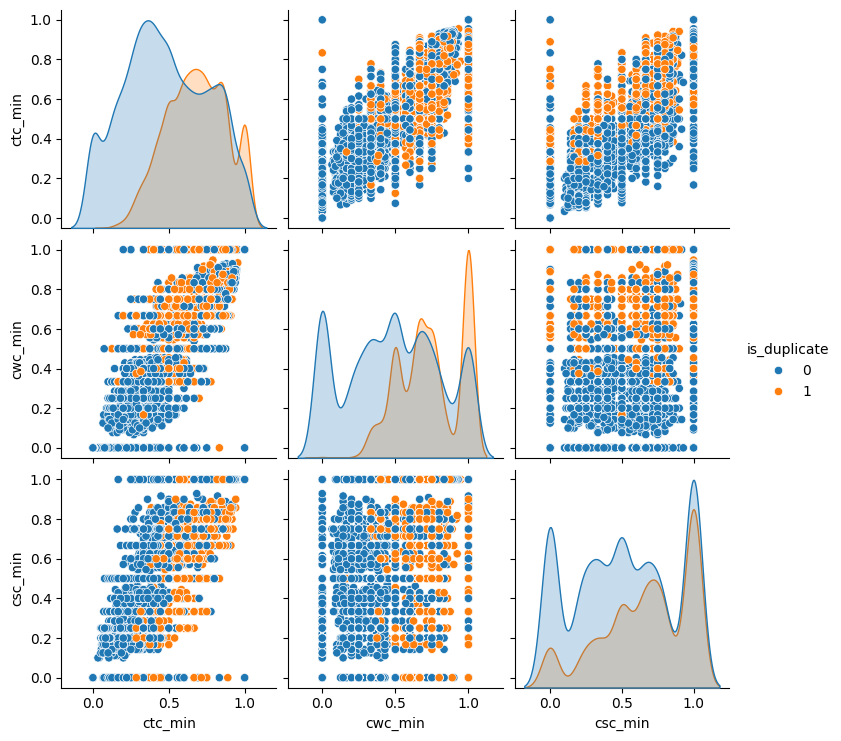

In [119]:
#EDA

sb.pairplot(p_df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']], hue = 'is_duplicate')

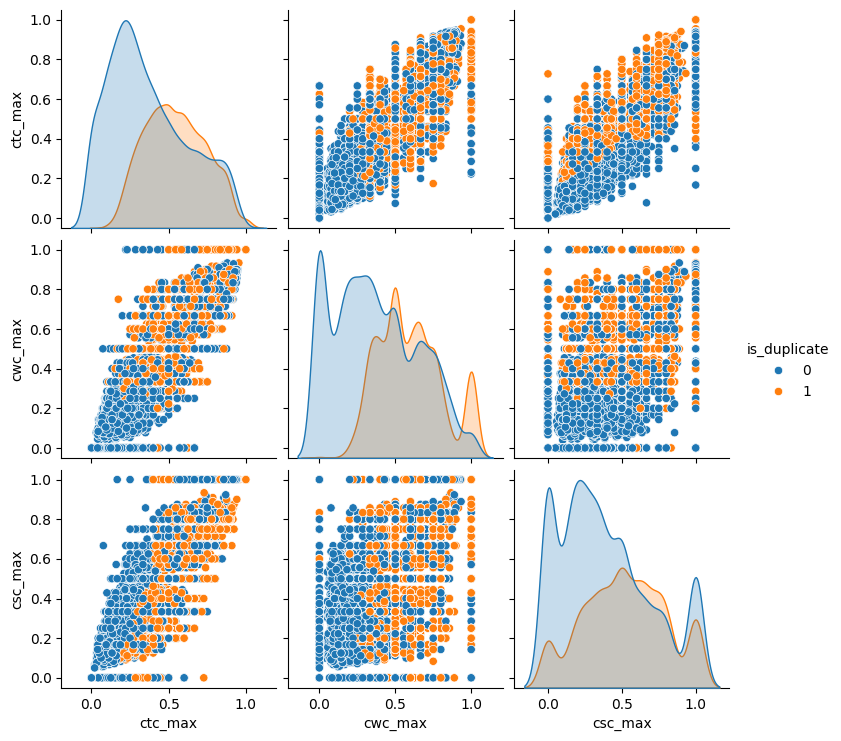

In [120]:
#EDA

sb.pairplot(p_df[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']], hue = 'is_duplicate')

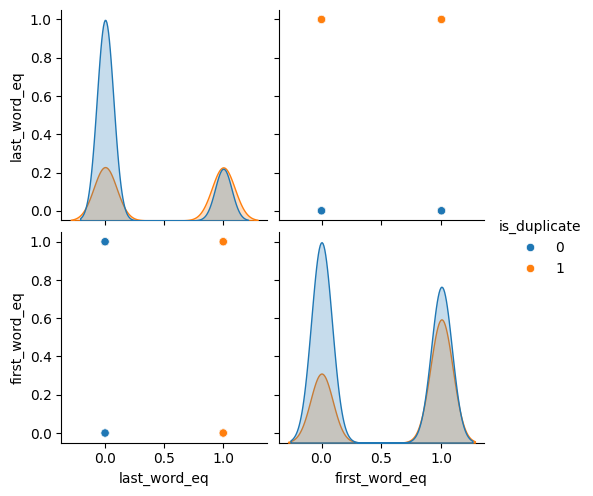

In [121]:
sb.pairplot(p_df[['last_word_eq','first_word_eq','is_duplicate']], hue = 'is_duplicate')

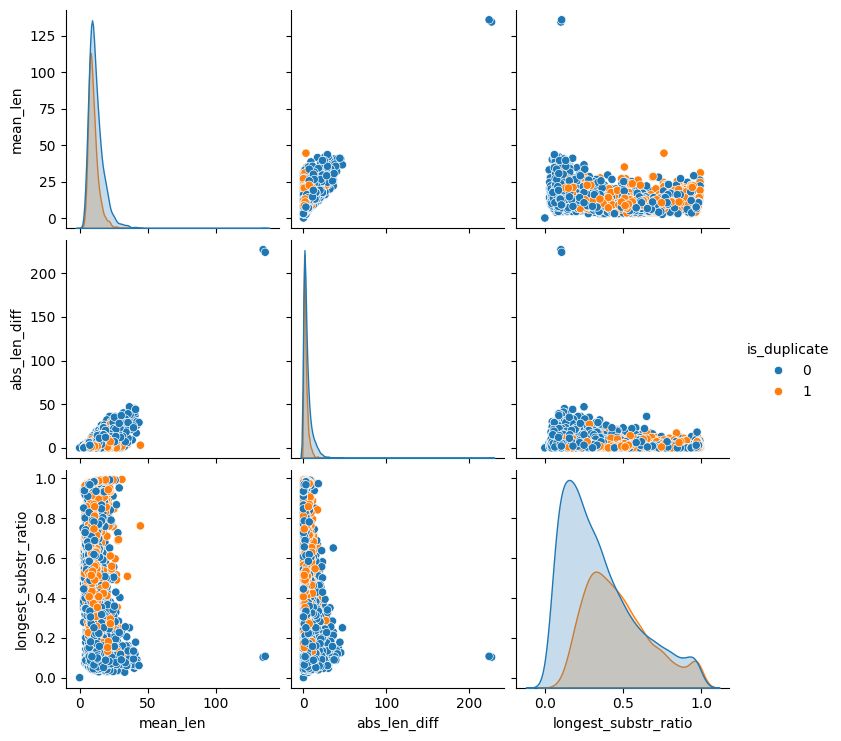

In [122]:
sb.pairplot(p_df[['mean_len','abs_len_diff', 'longest_substr_ratio', 'is_duplicate']], hue = 'is_duplicate')

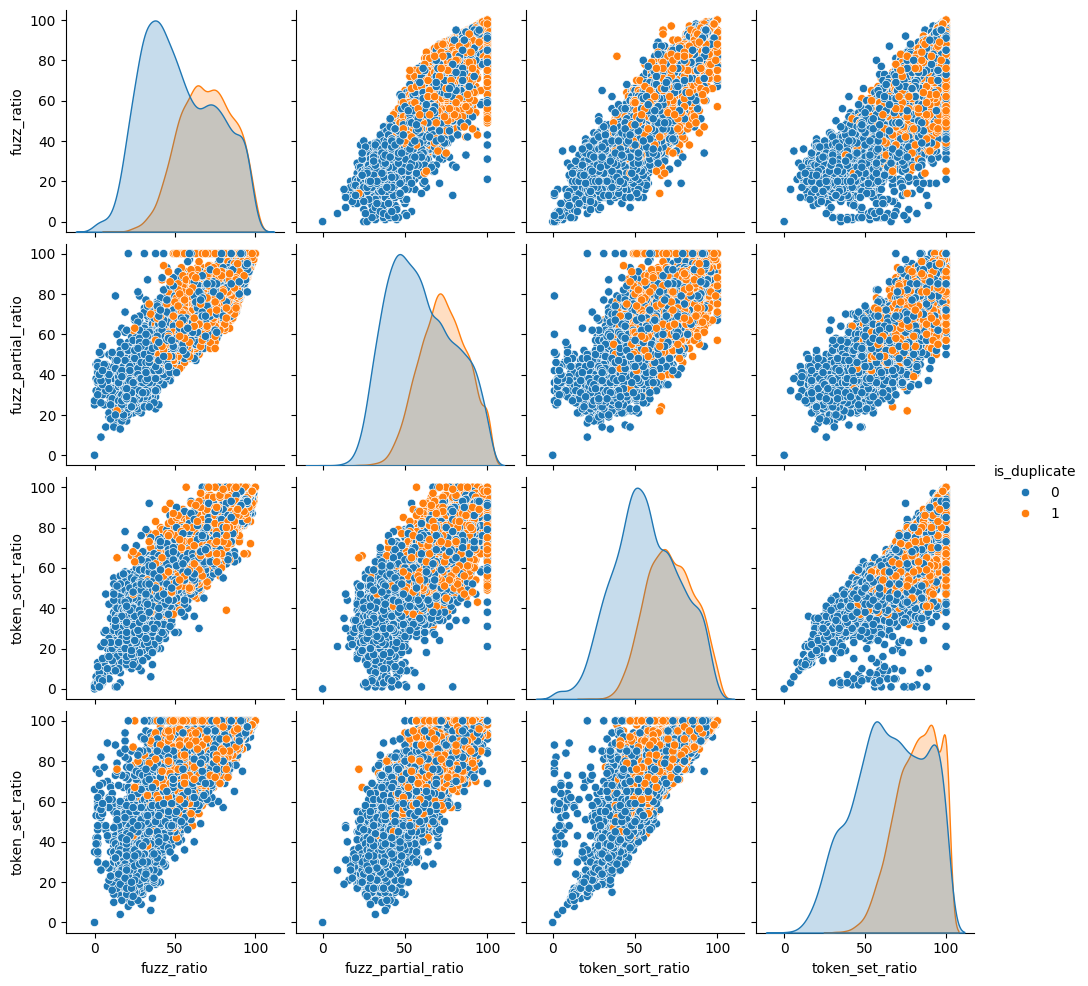

In [123]:
sb.pairplot(p_df[['fuzz_ratio', 'fuzz_partial_ratio','token_sort_ratio','token_set_ratio', 'is_duplicate']], hue = 'is_duplicate')

In [124]:
#Use TSNE for Dimentionality refuction for 15 feature(Generated after cleaning the data) to 3 dimention
from sklearn.preprocessing import MinMaxScaler

In [125]:
x = MinMaxScaler().fit_transform(p_df[['ctc_min', 'cwc_min', 'csc_min','mean_len','abs_len_diff', 'longest_substr_ratio','fuzz_ratio', 'fuzz_partial_ratio','token_sort_ratio', 'token_set_ratio','is_duplicate']])

In [126]:
y = p_df['is_duplicate'].values

In [127]:
from sklearn.manifold import TSNE

In [128]:
tsne2d = TSNE(
    n_components=2,
    init = 'random',#pca
    random_state=101,
    method = 'barnes_hut',
    n_iter = 1000,
    verbose = 2,
    angle =0.5
).fit_transform(x)

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.029s...
[t-SNE] Computed neighbors for 10000 samples in 0.912s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.080341
[t-SNE] Computed conditional probabilities in 0.313s
[t-SNE] Iteration 50: error = 96.5417328, gradient norm = 0.0439693 (50 iterations in 8.788s)
[t-SNE] It

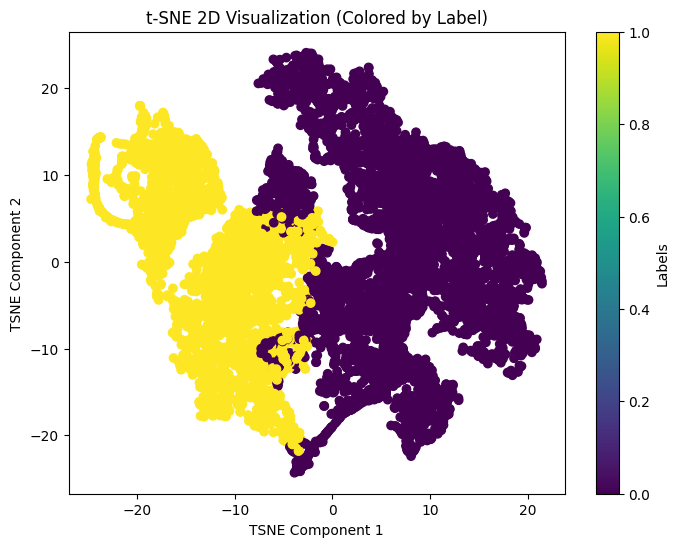

In [131]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
scatter = plt.scatter(tsne2d[:,0], tsne2d[:,1], c=y, cmap='viridis')
plt.title("t-SNE 2D Visualization (Colored by Label)")
plt.xlabel("TSNE Component 1")
plt.ylabel("TSNE Component 2")
plt.colorbar(scatter, label="Labels")
plt.show()


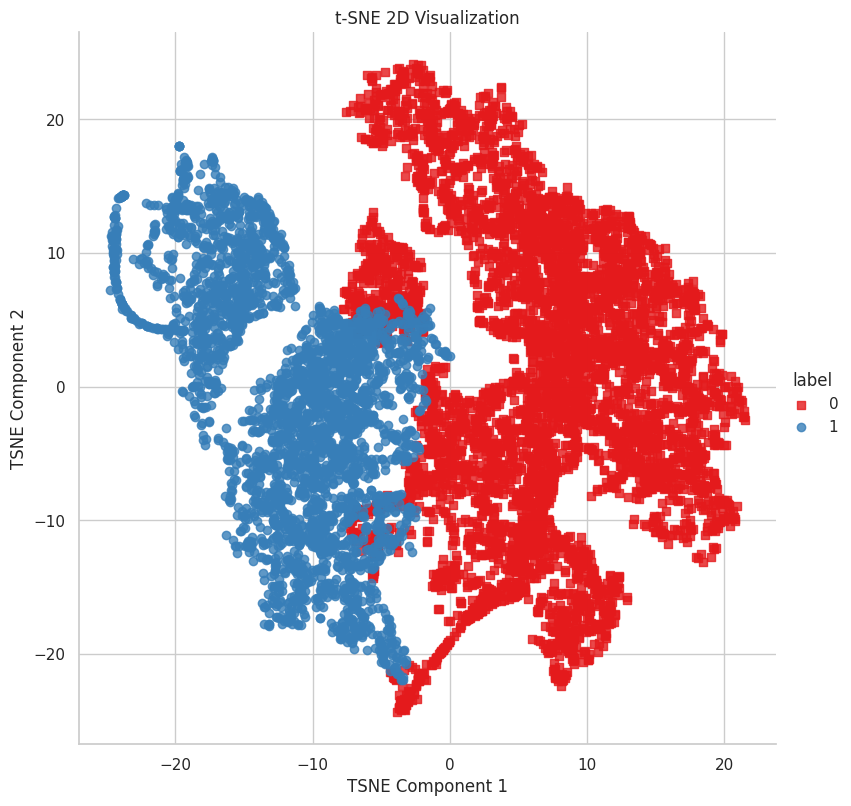

In [132]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create DataFrame from t-SNE vectors
x_df = pd.DataFrame({
    'x': tsne2d[:, 0],
    'y': tsne2d[:, 1],
    'label': y
})

# Plot using seaborn
sns.set(style="whitegrid")

sns.lmplot(
    data=x_df,
    x='x',
    y='y',
    hue='label',
    fit_reg=False,
    height=8,
    palette="Set1",
    markers=['s', 'o']
)

plt.title("t-SNE 2D Visualization")
plt.xlabel("TSNE Component 1")
plt.ylabel("TSNE Component 2")
plt.show()


In [ ]:
tsne3d = TSNE(
    n_components=3,
    init = 'random',#pca
    random_state=101,
    method = 'barnes_hut',
    n_iter = 1000,
    verbose = 2,
    angle =0.5
).fit_transform(x)

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.025s...
[t-SNE] Computed neighbors for 10000 samples in 1.896s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.080341
[t-SNE] Computed conditional probabilities in 0.774s
[t-SNE] Iteration 50: error = 97.4092560, gradient norm = 0.0298975 (50 iterations in 37.526s)
[t-SNE] I

In [ ]:
from sklearn.manifold import TSNE
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py
py.init_notebook_mode(connected=True)



# --- Plotly 3D ---
trace1 = go.Scatter3d(
    x=tsne3d[:, 0],
    y=tsne3d[:, 1],
    z=tsne3d[:, 2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color=y,
        colorscale='Portland',
        colorbar=dict(title='Label'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.75
    )
)

data = [trace1]
layout = dict(
    height=800,
    width=800,
    title='3D t-SNE Embedding with Engineered Features'
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')
